--2022-02-19 13:48:46--  https://raw.githubusercontent.com/tezz-io/_data/master/amazon_vfl_reviews.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 797308 (779K) [text/plain]
Saving to: ‘amazon_vfl_reviews.csv’

amazon_vfl_reviews. 100%[===================>] 778.62K  --.-KB/s    in 0.006s  

2022-02-19 13:48:46 (119 MB/s) - ‘amazon_vfl_reviews.csv’ saved [797308/797308]



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


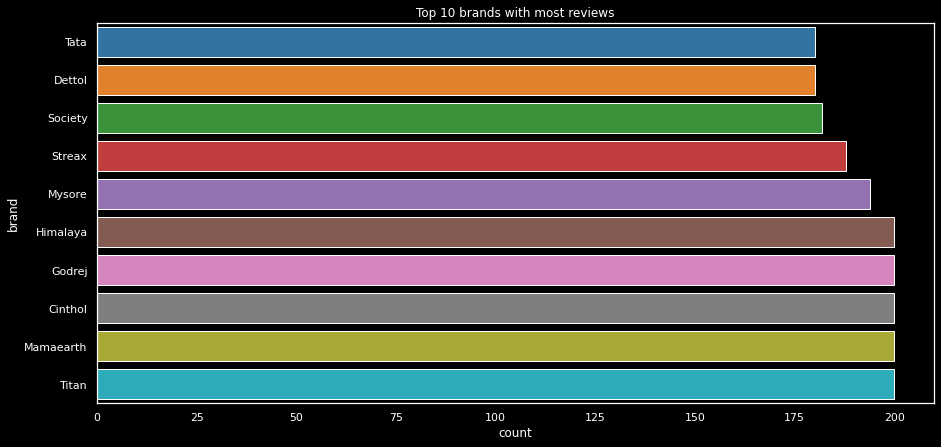

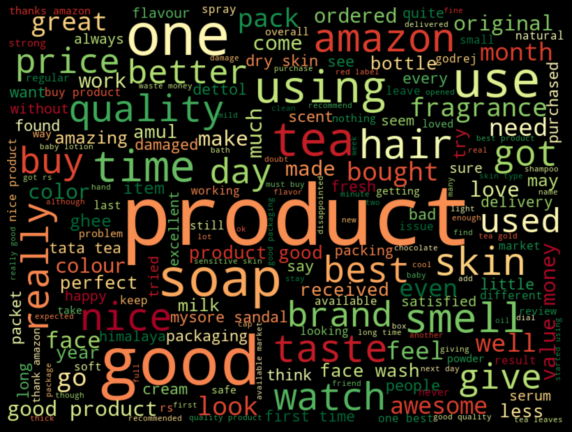

In [11]:
import numpy as np
import pandas as pd
import re
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
init_notebook_mode(connected= True)
import cufflinks as cf
cf.go_offline()
from wordcloud import WordCloud, ImageColorGenerator 
import nltk
from nltk.corpus import stopwords

!rm -rf amazon_vfl_reviews.csv
!wget https://raw.githubusercontent.com/tezz-io/_data/master/amazon_vfl_reviews.csv
from textblob import TextBlob
df= pd.read_csv('amazon_vfl_reviews.csv')
df.head()

df.isnull().sum()
df.shape

df.dropna(inplace= True)
df = df.reset_index()
df.drop(['index'], axis = 1, inplace= True) 
df.shape

def get_brand(x):
    return x.split('-')[0]

df['brand']= df['name'].apply(get_brand)
df['brand'].unique()

df['brand'] = df['brand'].str.replace('PATANJALI', 'Patanjali')
df['brand'] = df['brand'].str.replace('MYSORE', 'Mysore')

#number of unique brands
len(df['brand'].unique())

df1= pd.DataFrame(df.groupby('brand')['asin'].count().reset_index())
df1.columns= ['brand', 'count']

sort_df= df1.sort_values(['count'], ascending= True)

fig= px.bar(sort_df.iloc[:5, :], y= 'brand', x= 'count', orientation= 'h', color= 'count')
fig.update_layout(title_text= 'Top 5 brands with least number of reviews', title_x= .5, template= 'plotly_dark')
fig.show()

import seaborn as sns
sns.set(rc={'figure.figsize':(15,7)})
sns.set_theme(style="darkgrid")
plt.style.use("dark_background")
plt.title('Top 10 brands with most reviews')
sns.barplot(x= sort_df['count'].tail(10) , y= sort_df['brand'].tail(10), palette= 'tab10' ).grid(False)

brand= sort_df.iloc[-10: , :]['brand'].to_list()
count= sort_df.iloc[-10: , :]['count'].to_list()

fig= go.Figure(data= [go.Table(header= dict(values= ['Brand', 'Number of reviews'], fill_color= 'lightblue', height= 40 ),
                              cells= dict(values=[brand, count], height= 20))])
fig.update_layout(title_text='Top 5 Names of brands with most number of reviews',title_x=0.5,
                  template='plotly_dark')

fig.show()

import nltk
nltk.download('stopwords')
stop_words = stopwords.words('english')

corpus = []
for i in range(0,len(df)):
    text= re.sub('[^a-zA-Z]', ' ', df['review'][i])
    text= text.lower()
    text= text.split()
    text= [word for word in text if not word in stop_words]
    text= ' '.join(text)
    corpus.append(text)
    
word_cloud = WordCloud(width = 800,
                       height = 600,
                       colormap = 'RdYlGn', 
                       margin = 0,
                       max_words = 200,  
                       max_font_size = 120, 
                       background_color = 'black').generate(' '.join(corpus))


plt.figure(figsize = (10, 10))
plt.imshow(word_cloud, interpolation = 'gaussian')
plt.axis('off')
plt.show()

rating= pd.DataFrame(df['rating'].value_counts().reset_index())
rating.columns= ['rating', 'count']

rating.sort_values('rating', ascending= False, inplace= True)
rating

fig= px.bar(rating, x= 'rating', y= 'count')
fig.update_layout(title_text= 'Distribution of ratings', title_x= 0.5, template= 'plotly_dark')
fig.show()